In [6]:
## Testing out analyses on data subset

In [2]:
# Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import fiona
import pandas as pd
import geopandas as gpd
import rasterio as rio
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [3]:
# Source data, SRTM & GLIHT
srtm_source = os.path.join('/Users/arbailey/natcap/idb/data/source/srtm/nasa','SRTM30m_Andros.vrt')
glihtdtm_source = os.path.join('/Users/arbailey/natcap/idb/data/source/gliht/Andros_May2015/lidar/geotiff/Andros_May2015_DTM','Andros_May2015_DTM.vrt')
glihtchm_source = os.path.join('/Users/arbailey/natcap/idb/data/source/gliht/Andros_May2015/lidar/geotiff/Andros_May2015_CHM','Andros_May2015_CHM.vrt' )
# Working directory
work_dir = '/Users/arbailey/natcap/idb/data/work/andros_mangrovehgt'
os.chdir(work_dir)

In [4]:
# Directories and data of mangrove layers to be sampled
mangroves_dir = '/Users/arbailey/natcap/idb/data/work/mangroves'
mangroves_gpkg = os.path.join(mangroves_dir, 'mangroves_andros.gpkg')

## Layers
# Simard - Mangrove Height
mangrovehgt_tif = 'Mangrove_hmax95_andros.tif'
mangrovehgt_source = os.path.join(mangroves_dir, mangrovehgt_tif)
# Giri - Global Mangrove Forest
gmf_lyr = 'gmf_andros'
# Spalding - World Atlas of Mangroves
wam_lyr = 'wam2010_andros_droppedfields'
# Bunting - Global Mangrove Watch
gmw19962016_lyr = 'gmw_1996_2016_andros'
gmw2015_lyr = 'GMW_2015_v2_andros'
# TNC Landsat Mangroves
tnclandsat_lyr = 'mar_mangroves_2006'
# NatCap / TNC mangroves minus coppice and DBLE
ncmangwet_lyr = 'and_mar_wetlandmangrove_NATCAP_sp'

# Output Geopackage
out_gpkg = os.path.join(work_dir, 'gliht_srtm.gpkg')

# GLiHT/SRTM/maxheight/mangroves previously merged point layer
gliht_srtm_hmax95_mangroves_lyr = 'glihtchm_srtm_hmax95_mangroves_subset'

In [5]:
# Import the GLiHT point file layer into GeoDataFrame
%time gliht_srtm_hmax95_mangroves = gpd.read_file(out_gpkg, layer=gliht_srtm_hmax95_mangroves_lyr)
gliht_srtm_hmax95_mangroves

CPU times: user 1min 9s, sys: 2.97 s, total: 1min 12s
Wall time: 1min 13s


,z_m,x_utm17n,y_utm17n,srtm_m,srtm_id,hmax95,hmax95_id,gmf,wam,gmw2015,geometry
0,0.0,800952.5,2701734.5,5,41481243,-3.400000e+38,40990949,NaN,NaN,1.0,POINT (-78.03274 24.40000)
1,0.0,800953.5,2701734.5,5,41481243,-3.400000e+38,40990949,NaN,NaN,1.0,POINT (-78.03273 24.40000)
2,0.0,800954.5,2701734.5,5,41481243,-3.400000e+38,40990949,NaN,NaN,1.0,POINT (-78.03272 24.40000)
3,0.0,800955.5,2701734.5,5,41481243,-3.400000e+38,40990949,NaN,NaN,1.0,POINT (-78.03271 24.40000)
4,0.0,800956.5,2701734.5,5,41481243,-3.400000e+38,40990949,NaN,NaN,1.0,POINT (-78.03270 24.40000)
...,...,...,...,...,...,...,...,...,...,...,...
3134268,0.0,802646.5,2691223.5,0,43944037,-3.400000e+38,44267460,NaN,NaN,NaN,POINT (-78.01828 24.30487)
3134269,0.0,802641.5,2691222.5,0,43951238,-3.400000e+38,44267460,NaN,NaN,NaN,POINT (-78.01833 24.30486)
3134270,0.0,802644.5,2691221.5,0,43951238,-3.400000e+38,44267460,NaN,NaN,NaN,POINT (-78.01830 24.30485)
3134271,0.0,802646.5,2691220.5,0,43951238,-3.400000e+38,44267460,NaN,NaN,NaN,POINT (-78.01828 24.30484)


In [8]:
# Change hmax95 No Data values to NaN
gliht_srtm_hmax95_mangroves.loc[gliht_srtm_hmax95_mangroves['hmax95'] < 0, 'hmax95'] = np.nan
gliht_srtm_hmax95_mangroves

,z_m,x_utm17n,y_utm17n,srtm_m,srtm_id,hmax95,hmax95_id,gmf,wam,gmw2015,geometry
0,0.0,800952.5,2701734.5,5,41481243,NaN,40990949,NaN,NaN,1.0,POINT (-78.03274 24.40000)
1,0.0,800953.5,2701734.5,5,41481243,NaN,40990949,NaN,NaN,1.0,POINT (-78.03273 24.40000)
2,0.0,800954.5,2701734.5,5,41481243,NaN,40990949,NaN,NaN,1.0,POINT (-78.03272 24.40000)
3,0.0,800955.5,2701734.5,5,41481243,NaN,40990949,NaN,NaN,1.0,POINT (-78.03271 24.40000)
4,0.0,800956.5,2701734.5,5,41481243,NaN,40990949,NaN,NaN,1.0,POINT (-78.03270 24.40000)
...,...,...,...,...,...,...,...,...,...,...,...
3134268,0.0,802646.5,2691223.5,0,43944037,NaN,44267460,NaN,NaN,NaN,POINT (-78.01828 24.30487)
3134269,0.0,802641.5,2691222.5,0,43951238,NaN,44267460,NaN,NaN,NaN,POINT (-78.01833 24.30486)
3134270,0.0,802644.5,2691221.5,0,43951238,NaN,44267460,NaN,NaN,NaN,POINT (-78.01830 24.30485)
3134271,0.0,802646.5,2691220.5,0,43951238,NaN,44267460,NaN,NaN,NaN,POINT (-78.01828 24.30484)


In [10]:
# Add Unique ID for each GLiHT point (should do this before the polygon overlays)
gliht_srtm_hmax95_mangroves['ptid'] = gliht_srtm_hmax95_mangroves.index + 1
gliht_srtm_hmax95_mangroves

,z_m,x_utm17n,y_utm17n,srtm_m,srtm_id,hmax95,hmax95_id,gmf,wam,gmw2015,geometry,ptid
0,0.0,800952.5,2701734.5,5,41481243,NaN,40990949,NaN,NaN,1.0,POINT (-78.03274 24.40000),1
1,0.0,800953.5,2701734.5,5,41481243,NaN,40990949,NaN,NaN,1.0,POINT (-78.03273 24.40000),2
2,0.0,800954.5,2701734.5,5,41481243,NaN,40990949,NaN,NaN,1.0,POINT (-78.03272 24.40000),3
3,0.0,800955.5,2701734.5,5,41481243,NaN,40990949,NaN,NaN,1.0,POINT (-78.03271 24.40000),4
4,0.0,800956.5,2701734.5,5,41481243,NaN,40990949,NaN,NaN,1.0,POINT (-78.03270 24.40000),5
...,...,...,...,...,...,...,...,...,...,...,...,...
3134268,0.0,802646.5,2691223.5,0,43944037,NaN,44267460,NaN,NaN,NaN,POINT (-78.01828 24.30487),3134269
3134269,0.0,802641.5,2691222.5,0,43951238,NaN,44267460,NaN,NaN,NaN,POINT (-78.01833 24.30486),3134270
3134270,0.0,802644.5,2691221.5,0,43951238,NaN,44267460,NaN,NaN,NaN,POINT (-78.01830 24.30485),3134271
3134271,0.0,802646.5,2691220.5,0,43951238,NaN,44267460,NaN,NaN,NaN,POINT (-78.01828 24.30484),3134272


In [106]:
gliht_srtm_hmax95_mangroves.describe()

,z_m,x_utm17n,y_utm17n,srtm_m,srtm_id,hmax95,hmax95_id,gmf,wam,gmw2015,ptid
count,3.134273e+06,3.134273e+06,3.134273e+06,3.134273e+06,3.134273e+06,823711.000000,3.134273e+06,822711.0,5471.0,761119.0,3.134273e+06
mean,2.623890e-01,7.999753e+05,2.697557e+06,3.839834e+00,4.245318e+07,7.924044,4.228360e+07,1.0,1.0,1.0,1.567137e+06
std,7.590770e-01,2.678739e+03,2.967035e+03,2.757649e+00,7.021960e+05,3.271188,9.311020e+05,0.0,0.0,0.0,9.047868e+05
min,-1.136868e-13,7.941465e+05,2.691218e+06,-1.400000e+01,4.148102e+07,0.848500,4.099071e+07,1.0,1.0,1.0,1.000000e+00
25%,0.000000e+00,7.982985e+05,2.694872e+06,2.000000e+00,4.183405e+07,5.091000,4.145897e+07,1.0,1.0,1.0,7.835690e+05
50%,0.000000e+00,7.996575e+05,2.697980e+06,4.000000e+00,4.234528e+07,8.485000,4.214302e+07,1.0,1.0,1.0,1.567137e+06
75%,0.000000e+00,8.027565e+05,2.700190e+06,6.000000e+00,4.310158e+07,10.182000,4.314417e+07,1.0,1.0,1.0,2.350705e+06
max,1.115000e+01,8.044305e+05,2.701734e+06,2.200000e+01,4.395124e+07,13.576000,4.426746e+07,1.0,1.0,1.0,3.134273e+06


In [11]:
# Subset to include on CHM height > 0 and Max Height > 0
gliht_srtm_hmax95_mangroves_gt0_hmax = gliht_srtm_hmax95_mangroves[(gliht_srtm_hmax95_mangroves['z_m'] > 0) & (gliht_srtm_hmax95_mangroves['hmax95'] > 0)]
gliht_srtm_hmax95_mangroves_gt0_hmax

,z_m,x_utm17n,y_utm17n,srtm_m,srtm_id,hmax95,hmax95_id,gmf,wam,gmw2015,geometry,ptid
110,1.85,800860.5,2701732.5,5,41481240,8.485,40990946,1.0,NaN,1.0,POINT (-78.03364 24.40000),111
111,0.58,800861.5,2701732.5,5,41481240,8.485,40990946,1.0,NaN,1.0,POINT (-78.03363 24.40000),112
112,1.32,800862.5,2701732.5,5,41481240,8.485,40990946,1.0,NaN,1.0,POINT (-78.03362 24.40000),113
113,3.62,800863.5,2701732.5,5,41481240,8.485,40990946,1.0,NaN,1.0,POINT (-78.03361 24.40000),114
114,3.71,800864.5,2701732.5,5,41481240,8.485,40990946,1.0,NaN,1.0,POINT (-78.03360 24.40000),115
...,...,...,...,...,...,...,...,...,...,...,...,...
2652387,0.47,803949.5,2694149.5,2,43267192,5.091,43360185,1.0,NaN,NaN,POINT (-78.00483 24.33101),2652388
2652757,0.94,803911.5,2694148.5,5,43267190,8.485,43360184,1.0,NaN,NaN,POINT (-78.00521 24.33100),2652758
2652758,0.97,803912.5,2694148.5,5,43267190,8.485,43360184,1.0,NaN,NaN,POINT (-78.00520 24.33100),2652759
2652781,0.27,803935.5,2694148.5,3,43267191,5.091,43360185,1.0,NaN,NaN,POINT (-78.00497 24.33100),2652782


In [105]:
gliht_srtm_hmax95_mangroves_gt0_hmax.describe()

,z_m,x_utm17n,y_utm17n,srtm_m,srtm_id,hmax95,hmax95_id,gmf,wam,gmw2015,ptid
count,371714.000000,371714.000000,3.717140e+05,371714.000000,3.717140e+05,371714.000000,3.717140e+05,358127.0,0.0,268323.0,3.717140e+05
mean,1.816709,799072.815347,2.697992e+06,4.821764,4.234701e+07,8.105723,4.214266e+07,1.0,NaN,1.0,1.540196e+06
std,1.202631,2141.804504,1.826464e+03,2.015694,4.317540e+05,3.190979,5.724904e+05,0.0,NaN,0.0,6.538357e+05
min,0.010000,794464.500000,2.694148e+06,-3.000000,4.148102e+07,0.848500,4.099071e+07,1.0,NaN,1.0,1.110000e+02
25%,0.960000,797907.500000,2.697188e+06,4.000000,4.222287e+07,6.788000,4.197740e+07,1.0,NaN,1.0,1.362228e+06
50%,1.590000,798459.500000,2.697718e+06,5.000000,4.241007e+07,8.485000,4.222221e+07,1.0,NaN,1.0,1.684495e+06
75%,2.440000,799733.500000,2.698512e+06,6.000000,4.252528e+07,10.182000,4.238782e+07,1.0,NaN,1.0,1.962071e+06
max,11.150000,804430.500000,2.701732e+06,11.000000,4.326719e+07,13.576000,4.336018e+07,1.0,NaN,1.0,2.652783e+06


In [22]:
# Group by Max Height ID (grid cell) and calculate various stats
# gliht_srtm_hmax95_mangroves_gt0_hmax.groupby(['hmax95_id','hmax95'])['z_m'].max()  # creates series

gliht_srtm_hmax95_mangroves_gt0_hmax.groupby(['hmax95_id','hmax95'])[['z_m']].max()  # creates data frame with single column and index as group-by columns

 # creates data frame with 3 columns
gliht_srtm_hmax95_mangroves_gt0_hmax.groupby(
    ['hmax95_id','hmax95'], as_index=False
).agg(
    {'z_m': 'max',
    }
) 


,hmax95_id,hmax95,z_m
0,40990710,6.788,2.67
1,40990712,6.788,2.20
2,40990715,8.485,2.11
3,40990932,13.576,2.37
4,40990933,13.576,3.25
...,...,...,...
1028,43352982,5.091,3.36
1029,43352983,10.182,2.00
1030,43352984,5.091,2.96
1031,43360184,8.485,1.84


In [27]:
# Multiple stats on a single column --> renamed
# This does not show the grouped-by columns
gliht_srtm_hmax95_mangroves_gt0_hmax.groupby(
    ['hmax95_id','hmax95'], as_index=False
).agg(
    max_z = ('z_m', 'max'),
    min_z = ('z_m', 'min'),
    count_z = ('z_m', 'count'),
    mean_z = ('z_m', 'mean'),
)  

,max_z,min_z,count_z,mean_z
0,2.67,0.09,142,0.702746
1,2.20,0.14,71,1.037324
2,2.11,0.08,65,0.895077
3,2.37,0.85,25,1.542400
4,3.25,0.48,135,1.330370
...,...,...,...,...
1028,3.36,0.31,149,1.534966
1029,2.00,0.10,47,0.940426
1030,2.96,0.20,55,1.100000
1031,1.84,0.33,32,1.088437


In [41]:
# Multiple stats on a single column (could be multiple columns)
gliht_srtm_hmax95_mangroves_gt0_hmax.groupby(
    ['hmax95_id','hmax95'], as_index=False
).agg(
    {'z_m': ['max', 'min', 'count', 'mean']}
)  

hmax95_id  hmax95   z_m                      
                         max   min count      mean
0     40990710   6.788  2.67  0.09   142  0.702746
1     40990712   6.788  2.20  0.14    71  1.037324
2     40990715   8.485  2.11  0.08    65  0.895077
3     40990932  13.576  2.37  0.85    25  1.542400
4     40990933  13.576  3.25  0.48   135  1.330370
...        ...     ...   ...   ...   ...       ...
1028  43352982   5.091  3.36  0.31   149  1.534966
1029  43352983  10.182  2.00  0.10    47  0.940426
1030  43352984   5.091  2.96  0.20    55  1.100000
1031  43360184   8.485  1.84  0.33    32  1.088437
1032  43360185   5.091  3.37  0.05   462  1.458095

[1033 rows x 6 columns]

In [47]:
# Multiple stats on a single column (could be many columns) --> renamed
# Makes the grouped columns into multi-column index
groupedHmax_gliht = gliht_srtm_hmax95_mangroves_gt0_hmax.groupby(
    ['hmax95_id','hmax95']
).agg(
    max_z = ('z_m', 'max'),
    min_z = ('z_m', 'min'),
    mean_z = ('z_m', 'mean'),
    median_z = ('z_m', 'median'),
    var_z = ('z_m', 'var'),
    skew_z = ('z_m', 'skew'),
    count_z = ('z_m', 'count'),
) 
groupedHmax_gliht.reset_index(inplace=True)  # Reset index to make grouped columns into regular columns
groupedHmax_gliht

,hmax95_id,hmax95,max_z,min_z,mean_z,median_z,var_z,skew_z,count_z
0,40990710,6.788,2.67,0.09,0.702746,0.63,0.241688,1.870353,142
1,40990712,6.788,2.20,0.14,1.037324,1.07,0.242868,0.054106,71
2,40990715,8.485,2.11,0.08,0.895077,0.84,0.288888,0.714299,65
3,40990932,13.576,2.37,0.85,1.542400,1.60,0.165269,0.095067,25
4,40990933,13.576,3.25,0.48,1.330370,1.23,0.226265,1.592517,135
...,...,...,...,...,...,...,...,...,...
1028,43352982,5.091,3.36,0.31,1.534966,1.27,0.781882,0.627970,149
1029,43352983,10.182,2.00,0.10,0.940426,0.89,0.234565,0.389676,47
1030,43352984,5.091,2.96,0.20,1.100000,0.80,0.519807,0.672721,55
1031,43360184,8.485,1.84,0.33,1.088437,1.06,0.133149,0.232242,32


In [48]:
groupedHmax_gliht.describe()

,hmax95_id,hmax95,max_z,min_z,mean_z,median_z,var_z,skew_z,count_z
count,1.033000e+03,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1030.000000,1025.000000,1033.000000
mean,4.217860e+07,7.942880,3.728693,0.215344,1.516591,1.424981,0.618929,0.615362,359.839303
std,6.397871e+05,3.267739,1.705058,0.280746,0.730662,0.733796,0.650088,0.603872,283.737953
min,4.099071e+07,0.848500,0.410000,0.010000,0.380000,0.330000,0.001800,-1.402074,1.000000
25%,4.163179e+07,5.091000,2.720000,0.080000,1.052187,0.950000,0.302784,0.206370,89.000000
50%,4.222222e+07,8.485000,3.580000,0.130000,1.346905,1.230000,0.515203,0.550554,300.000000
75%,4.245262e+07,10.182000,4.280000,0.250000,1.778667,1.700000,0.720387,0.950872,626.000000
max,4.336018e+07,13.576000,11.150000,4.360000,6.064164,5.995000,8.716372,3.117226,877.000000


In [86]:
def linear_regress(df, x_att, y_att, fi=True):
    linear_regressor = LinearRegression(fit_intercept=fi)  # create object for the class
    X = df[x_att].values.reshape(-1, 1)
    Y = df[y_att].values.reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions

    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='orange')
    plt.xlabel(x_att)
    plt.ylabel(y_att)
    plt.show()

    r_sq = linear_regressor.score(X, Y)
    print("R squared:", r_sq)
    intercept = linear_regressor.intercept_
    print("intercept:", intercept)
    slope = linear_regressor.coef_
    print("slope:", slope)
    rmse = np.sqrt(mean_squared_error(y_true=Y, y_pred=Y_pred))
    print("RMSE:", rmse)

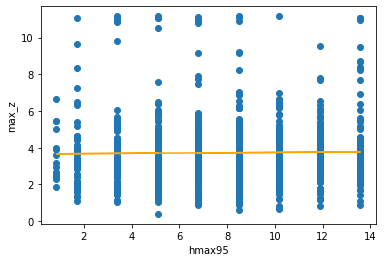

R squared: 0.00022876919415215638
intercept: [3.66600741]
slope: [[0.00789207]]
RMSE: 1.7040377827725772


In [101]:
linear_regress(groupedHmax_gliht, 'hmax95', 'max_z', True)

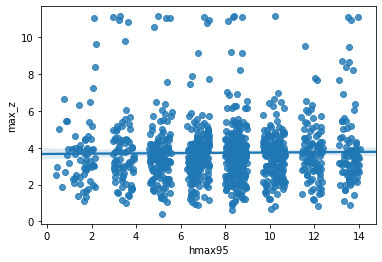

In [104]:
# Scatter plot with jitter
sns.regplot(x="hmax95", y="max_z", data=groupedHmax_gliht,  x_jitter=.5);

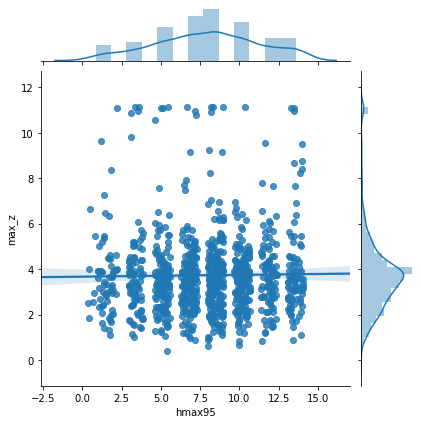

In [132]:
# Scatter plot, regression, and kernel density fits
sns.jointplot(x="hmax95", y="max_z", data=groupedHmax_gliht, kind="reg", x_jitter=.5)

Text(0.0, 1.0, 'Trying 2D density graph')

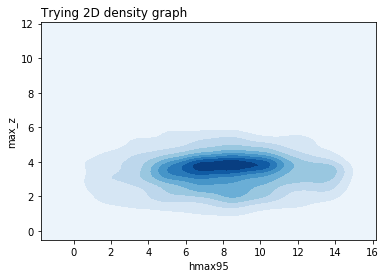

In [108]:
# 2D density graph
sns.kdeplot(groupedHmax_gliht['hmax95'],groupedHmax_gliht['max_z'], cmap="Blues", shade=True)
plt.title('Trying 2D density graph', loc='left')

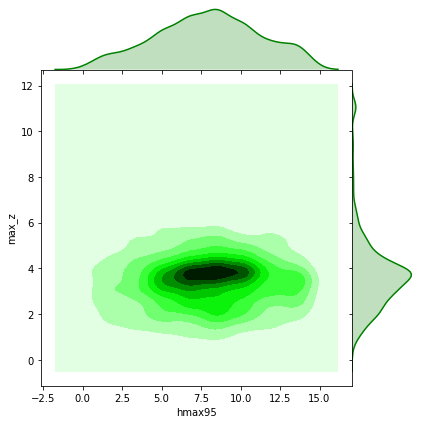

In [126]:
sns.jointplot(x="hmax95", y="max_z", data=groupedHmax_gliht, kind="kde", space=0, color="green")

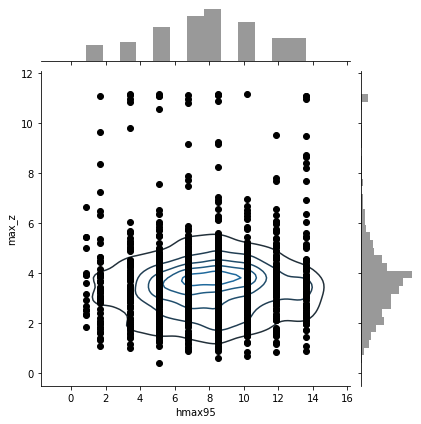

In [128]:
g = (sns.jointplot(x="hmax95", y="max_z", data=groupedHmax_gliht, color="black")
      .plot_joint(sns.kdeplot, zorder=0, n_levels=6))

Text(0.0, 1, 'Simard max height vs GLiHT max height')

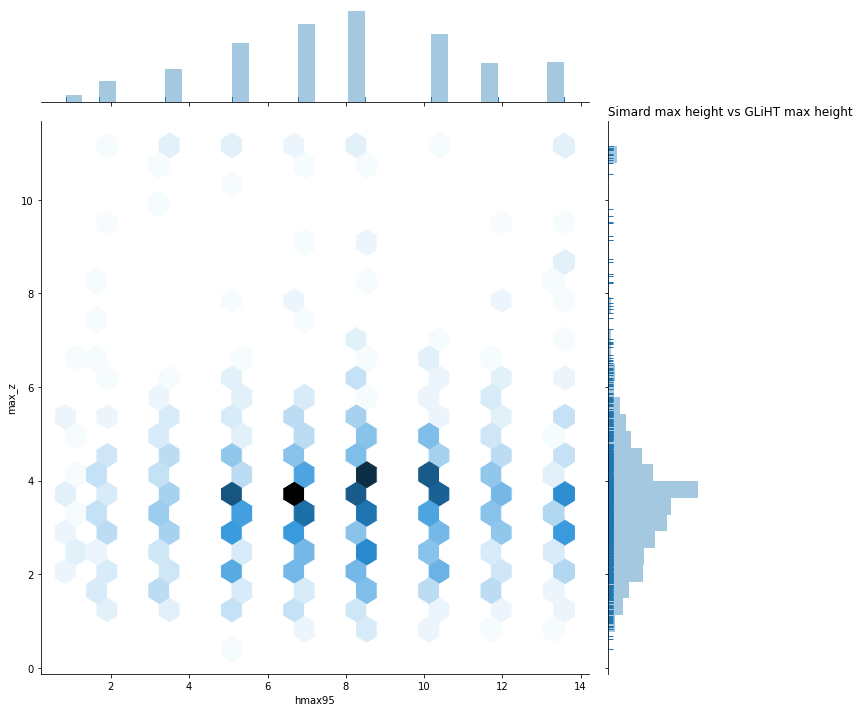

In [131]:
sns.jointplot(x=groupedHmax_gliht['hmax95'], y=groupedHmax_gliht['max_z'], 
              kind='hex', height=10,
              marginal_kws=dict(bins=30, rug=True))
plt.title('Simard max height vs GLiHT max height', loc='left')

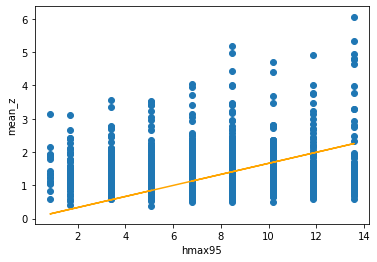

R squared: -0.5015838684778053
intercept: 0.0
slope: [[0.16600311]]
RMSE: 0.8949130177539888


In [89]:
linear_regress(groupedHmax_gliht, 'hmax95', 'mean_z', False)

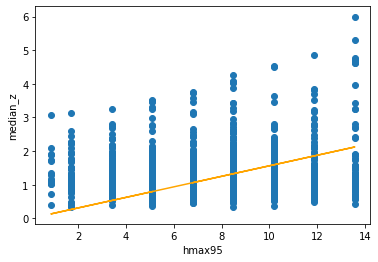

R squared: -0.4222798592053951
intercept: 0.0
slope: [[0.15636707]]
RMSE: 0.8746973292583137


In [90]:
linear_regress(groupedHmax_gliht, 'hmax95', 'median_z', False)